Name - Shubham Chowdhary

Student ID - 2318200

Date - 07/11/2023



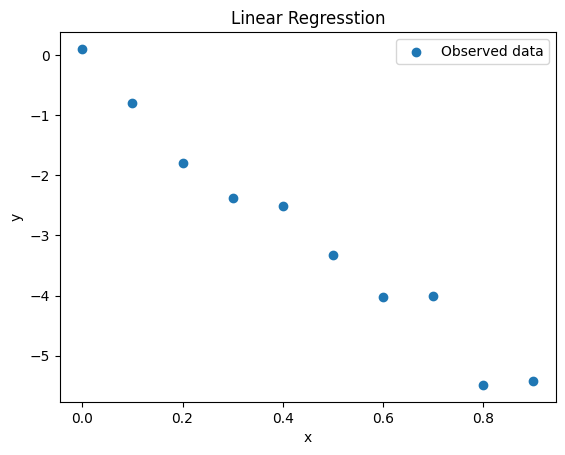

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.load("x_values.npy" , "r");
y = np.load("y_values.npy" , "r");

plt.scatter(x, y, label = "Observed data")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regresstion')
plt.legend()
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression();
model.fit(x,y)

LinearRegression()

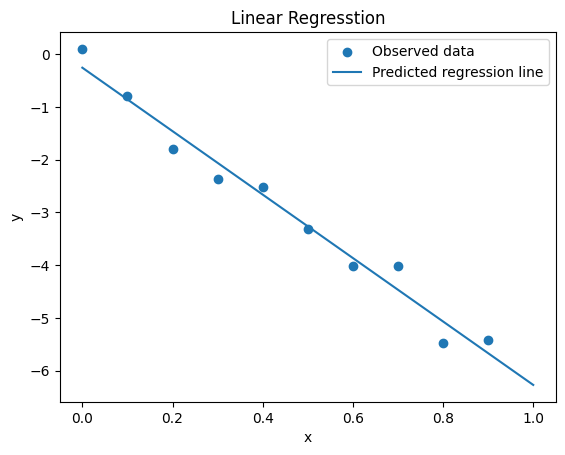

In [3]:
test_x = np.load("test_x_values.npy" , "r");
predict_y = model.predict(test_x);

plt.scatter(x, y, label = "Observed data")
plt.plot(test_x, predict_y, label = "Predicted regression line")

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regresstion')
plt.legend()
plt.show()

In [4]:
x_value = [0.48]
print(model.predict(np.array(x_value).reshape((1, -1)))[0])

[-3.14442237]


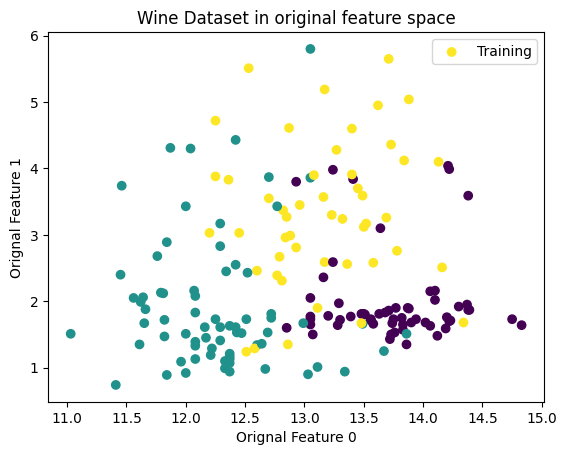

In [6]:
x = np.load("wineData.npy" , "r");
y = np.load("wineLabels.npy" , "r");

plt.scatter(x[:,0], x[:,1],c = y, label = "Training")

plt.xlabel('Orignal Feature 0')
plt.ylabel('Orignal Feature 1')
plt.title('Wine Dataset in original feature space')
plt.legend()
plt.show()

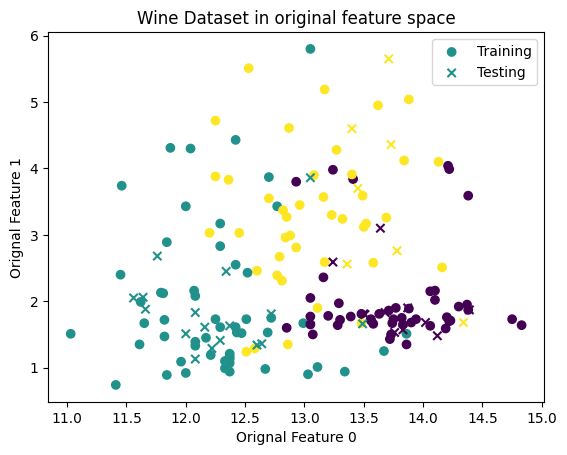

In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.20, random_state=0)

plt.scatter(train_data[:,0], train_data[:,1], marker='o', c=train_labels, label = "Training")
plt.scatter(test_data[:, 0], test_data[:, 1], marker='x', c=test_labels, label = "Testing")

plt.xlabel('Orignal Feature 0')
plt.ylabel('Orignal Feature 1')
plt.title('Wine Dataset in original feature space')
plt.legend()
plt.show()

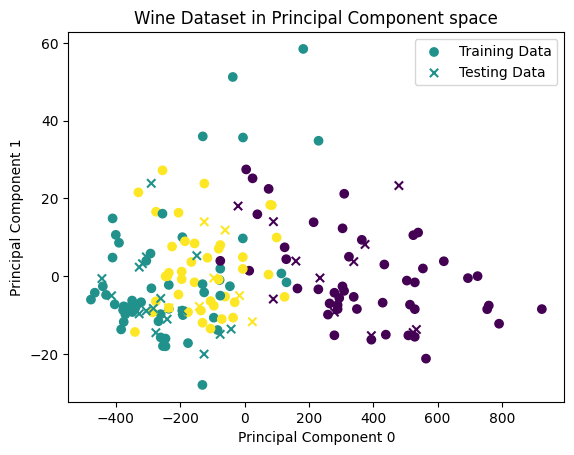

In [8]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
pca.fit(train_data)
train_data_reduced = pca.transform(train_data)
test_data_reduced = pca.transform(test_data)

plt.scatter(train_data_reduced[:, 0], train_data_reduced[:, 1], c=train_labels, marker='o', label='Training Data')
plt.scatter(test_data_reduced[:, 0], test_data_reduced[:, 1], c=test_labels, marker='x', label='Testing Data')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.legend()
plt.title('Wine Dataset in Principal Component space')
plt.show()

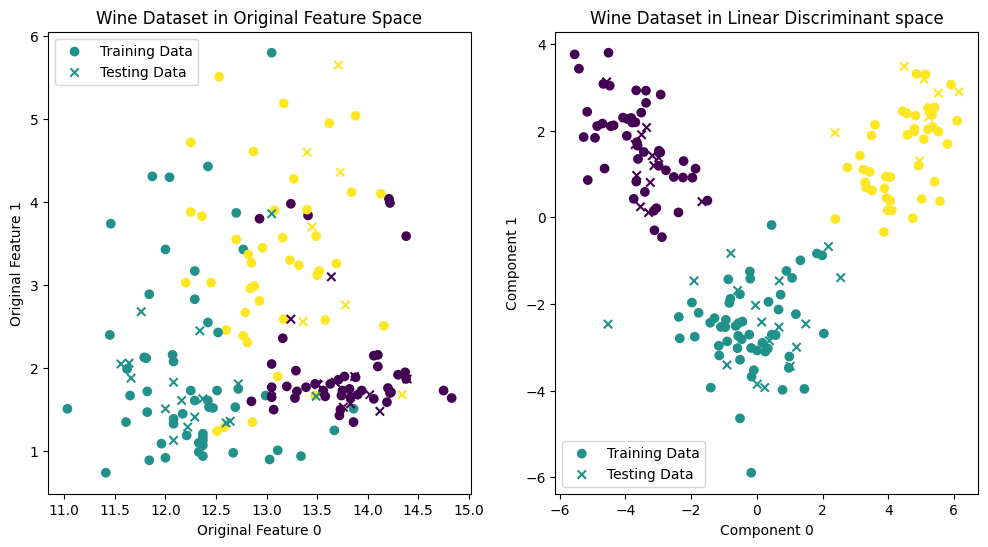

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(train_data, train_labels)
train_data_reduced = lda.transform(train_data)
test_data_reduced = lda.transform(test_data)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, marker='o', label='Training Data')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, marker='x', label='Testing Data')
plt.xlabel('Original Feature 0')
plt.ylabel('Original Feature 1')
plt.legend()
plt.title('Wine Dataset in Original Feature Space')

plt.subplot(1, 2, 2)
plt.scatter(train_data_reduced[:, 0], train_data_reduced[:, 1], c=train_labels, marker='o', label='Training Data')
plt.scatter(test_data_reduced[:, 0], test_data_reduced[:, 1], c=test_labels, marker='x', label='Testing Data')
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.legend()
plt.title('Wine Dataset in Linear Discriminant space')
plt.show()

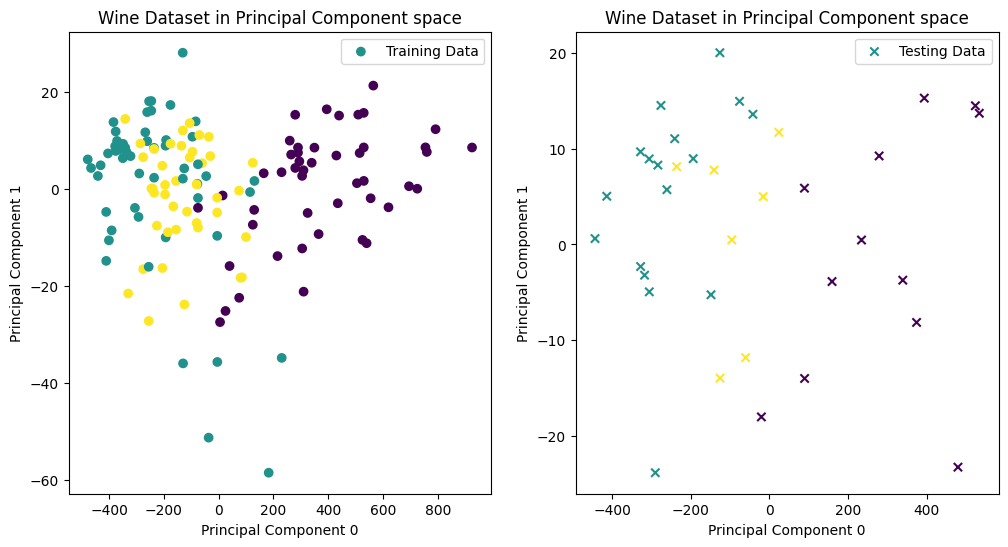

In [10]:
mean_vector = np.mean(train_data, axis=0)
centered_train_data = train_data - mean_vector
u, s, vh = np.linalg.svd(centered_train_data)
num_components = 2
projection_matrix = vh[:num_components].T
projected_train_data = np.dot(centered_train_data, projection_matrix)
centered_test_data = test_data - mean_vector
projected_test_data = np.dot(centered_test_data, projection_matrix)

# Visualize the projected training and testing data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(projected_train_data[:, 0], projected_train_data[:, 1], c=train_labels, marker='o', label='Training Data')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.legend()
plt.title('Wine Dataset in Principal Component space')
plt.subplot(1, 2, 2)
plt.scatter(projected_test_data[:, 0], projected_test_data[:, 1], c=test_labels, marker='x', label='Testing Data')
plt.xlabel('Principal Component 0')
plt.ylabel('Principal Component 1')
plt.legend()
plt.title('Wine Dataset in Principal Component space')
plt.show()

Number of components to retain at least 90% of the variance: 87


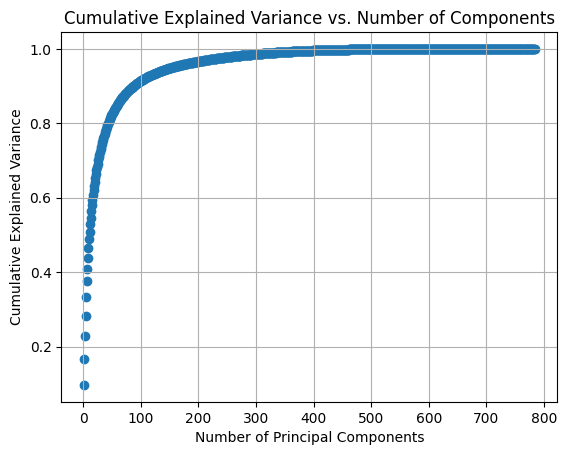

In [11]:
data = np.load('task3_5_data.npy')
labels = np.load('task3_5_labels.npy')
pca = PCA()
pca.fit(data)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_90_variance = np.argmax(cumulative_variance >= 0.9) + 1

print(f"Number of components to retain at least 90% of the variance: {num_components_90_variance}")

plt.scatter(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

Task 3.6 Challenge

*   Q 1.Why do we not compute a projection matrix and mean value for the testing sets?
*   Ans 1.->  In macine learning Covariance matrix is used to  implicit centering of data. So it really not matter whether you center your training data or not. The projections that you obtain would only be in a different(tranlated by the mean) co-ordinate system if you center the test data.

*   Q 2.Why does LDA give us nice distinct clusters for our Wine Dataset when PCA does not?
*   Ans 2.->  LDA is more effective than PCA for classification datasets because LDA reduces the dimensionality of the data by maximizing class separability. It is easier to draw decision boundaries for data with maximum class separability.



*   Q 3.What benefit does dimensionality reduction provide? What are the drawbacks?
*   Ans 3 ->  Dimensionality reduction brings  advantages to  machine learning data, including: Fewer features mean less complexity.



*   Q 4.How could you use LDA to predict class labels?
*   Ans 4-> It consists of statistical properties of data, calculated for each class. For a single input variable (x) this is  mean and  variance of  variable for each class.







